# Redes Neuronales

<center>
    
<img src='images/Neuron.svg' width=60%\>
</center>

[Fuente Wikipedia](https://commons.wikimedia.org/w/index.php?title=File:Neuron.svg&oldid=343028396)

Una red neuronal es una estructura compuesta por **nodos** o **unidades** que se encuentran interconectados. La potencia de la interconexión entre los nodos se evalúa por medio un valor de **peso**. Si la suma ponderada de todas las conexiones al **nodo** o **neurona** es mayor que un **valor umbral**, decimos que la neurona se **activa**. La función matemática aplicada a la suma ponderada se denomina **función de activación**. 

Se denomina **Modelo de Perceptrón** a una red neuronal con una sola salida.

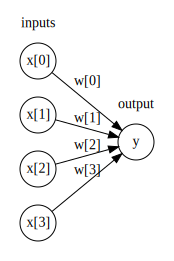

In [3]:
import mglearn
mglearn.plots.plot_logistic_regression_graph()

Sea $\mathbf{X}$ el espacio de entrada que contiene $N$ muestras de datos. Cada muestra está descrita por $d$ características o **features**. Sea $\mathcal{Y} = \{-1, +1\}$ el espacio de salida binario. El perceptrón queda definido por:


    
$h(\mathbf{x}) = sign \left( \sum_{i=1}^{d} \left( w_ix_i \right) + b \right)$

Donde **sign** es la función signo

Sea $\mathbf{w} = \{w_{0},w_{1}, w_{2}, \dots, w_{d} \}^T$ el vector de pesos; en donde $w_{0}=b$ y sea $\mathbf{x} = \{x_{0},x_{1}, x_{2}, \dots, x_{d} \}^T $ con $w_{0}=1$, entonces la expresión para el Perceptron se puede reescribir:

$h(\mathbf{x}) = sign \left(  \mathbf{w}^T \mathbf{x} \right)$

## Algoritmo de aprendizaje del perceptrón
Para realizar el entrenamiento es preciso que las muestras de datos y etiquetas (o valores) sean randomizados. Luega en cada iteración se corregirá los valores del vector $\mathbf{w}$, mediante la siguiente expresión:

$\mathbf{w}(t+1)=\mathbf{w}(t)+\alpha y(t)\mathbf{x}(t)$

## El Perceptron  y la compuerta AND
La compuerta **and** consta de 4 ejemplos. Cada uno con 2 características $d=2$. 


| muestra | x1 | x2 | y  |
|---------|----|----|----|
| 1       | -1 | -1 | -1 |
| 2       | -1 |  1 | -1 |
| 3       |  1 | -1 | -1 |
| 4       |  1 | 1  |  1 |



In [4]:
import numpy as np
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
Y = np.array([-1, -1, -1, 1])

In [5]:
from sklearn.linear_model import Perceptron
percept_and = Perceptron(verbose=1, shuffle=True)
percept_and.fit(X, Y)
print('Rendimiento del entrenamiento: {}'.format(percept_and.score(X,Y)))

-- Epoch 1
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 4, Avg. loss: 0.750000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 8, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 12, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 16, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 20, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Rendimiento del entrenamiento: 1.0


/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [6]:
y_pred = percept_and.predict(X)
y_pred

array([-1, -1, -1,  1])

## Ejercicio:
1. Verifique que la Compuerta **XOR** No tiene solución con un Perceptron
2. Verifique que la Computerta **OR** Tiene solución con un Perceptrón
3. Escriba un programa en Python que ejecute el algoritmo de aprendizaje del Perceptrón

## Redes Neuronales Multicapa con Alimentación hacia adelante (Feed Forward)
Al añadir capas ocultas a una estructra de redes neuronales se amplía el espacio de hipótesis. Una red sencilla con una capa oculta con 3 perceptrones es la indicada en la siguiente figura. Observe la estructura de izquiera a derecha formada por:

* Capa de entrada
* Capa oculta
* Capa de Salida

Note que la capa de salida puede tener más nodos.


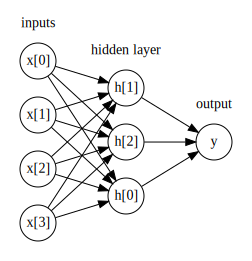

In [7]:
mglearn.plots.plot_single_hidden_layer_graph()


La complejidad del problema puede requerir incrementar el número de capas ocultas. Para entrenar este tipo de redes se necesita el algoritmo de **back propagation** o retropropagación del error, ya que al tener varias neuronas en una capa oculta se dispone de un vector de hipótesis cuyos valores correctos no se conocen previamente. 

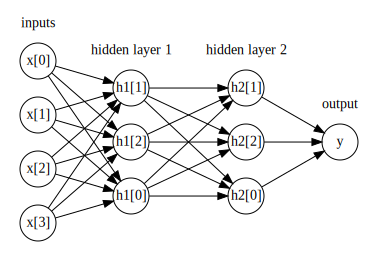

In [8]:
mglearn.plots.plot_two_hidden_layer_graph()

## Ejercicio:
Utilice una red neuronal multicapa para clasificar los datos del dataset moons, con:
* Algoritmo de descenso de gradiente estocástico,
* 50 neuronas en la capa oculta,
* Función de activación relu, luego con sigmoid
* Pruebe con algoritmo lbfgs y sgd 

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)


Realicemos un plot de los datos

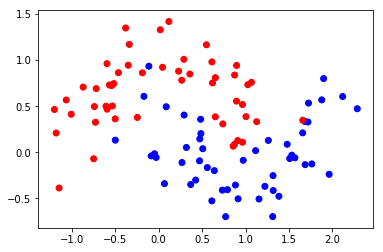

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, cmap=cm_bright)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42) #, stratify=y
red = MLPClassifier(hidden_layer_sizes=(50,), 
                    solver='lbfgs', 
#                     learning_rate_init=0.0001, 
#                     activation='relu', 
                    random_state=0, 
                    verbose=True, 
                    max_iter=1000)
history = red.fit(X_train, y_train)



In [12]:
X_test

array([[ 1.31702684, -0.2525239 ],
       [ 1.15536561, -0.50593577],
       [ 1.31311917, -0.69665985],
       [ 0.8729088 ,  0.08643291],
       [ 1.72532644,  0.53367598],
       [-0.4993884 ,  0.13192906],
       [ 0.35940317,  0.84867003],
       [-0.16955317,  0.60660877],
       [ 1.50917461, -0.06701048],
       [ 0.36877983, -0.34894509],
       [-0.7280717 ,  0.3259131 ],
       [ 0.77145295, -0.69709227],
       [ 1.00549331,  0.38686701],
       [-0.74872343, -0.06972957],
       [ 1.89948318,  0.79928869],
       [-0.87006365,  0.70686285],
       [ 1.12856036,  0.33191968],
       [ 0.97370054, -0.08631168],
       [ 0.89715307,  0.94175457],
       [-0.51699811,  0.74457804],
       [-0.59385445,  0.46769065],
       [-0.46333991,  0.86330772],
       [ 0.55039452,  1.16554689],
       [-0.60690411,  0.50000529],
       [ 0.42598043, -0.3006242 ]])

La precisión sobre el dataset de entrenamiento es:

In [13]:
acc = red.score(X_train, y_train)
acc

1.0

La precisión sobre el dataset de prueba es:

In [14]:
acc_test = red.score(X_test, y_test)
acc_test

0.88

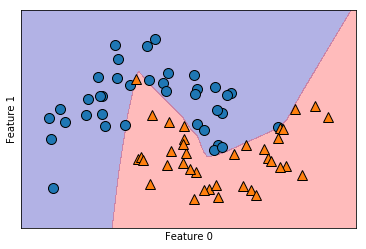

In [15]:
mglearn.plots.plot_2d_separator(red, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")
plt.show()

## Ejercicio
Resuelva el problema del perceptron con 2 neuronas en la capa oculta. Considere utilizar una función de activación apropiada

In [16]:
X = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
Y = np.array([[-1], [1], [1],[-1] ])

Pruebe el código utiliznado:
1. SGD
2. lbfgs

In [36]:
red_xor = MLPClassifier(hidden_layer_sizes=(2,2),
                        activation='tanh',
                        solver='lbfgs',
                        max_iter=1500, verbose=1)
#lbfgs / lbfgs

Entrenando la red:

In [37]:
red_xor.fit(X, Y)

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [38]:
red_xor.score(X, Y)

1.0

In [39]:
y_pred = red_xor.predict(X)
y_pred

array([-1,  1,  1, -1])

In [40]:
y_grafico = [-1, 1, 1, -1]

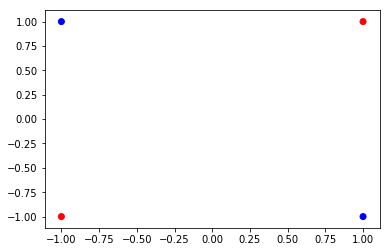

In [41]:
plt.figure()
plt.scatter(X[:,0],X[:,1], c=y_grafico, cmap=cm_bright)
plt.show()

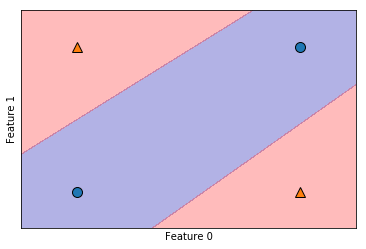

In [42]:
mglearn.plots.plot_2d_separator(red_xor, X, fill=True, alpha=.3)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y_grafico) 
plt.xlabel("Feature 0") 
plt.ylabel("Feature 1")
plt.show()

## Ejercicios adicionales
Resuelva con una arquitectura de red neuronal feed forward multicapa el dataset iris

## Red Neuronal como Regresión
Considere una función $y = x^2-2x+3$. Para el intervalo de $[-5, 5]$ Obtenga 1000 puntos. Puede hacer que la red neuronal reproduzca esta función en el Intervalo propuesto?

Que pasa si incrementa el dataset a 2000 muestras?

In [43]:
x = np.linspace(-5,5, num=2000)
# x = np.arange(10)
y = x*x-2*x+3


In [44]:
x

array([-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,
        5.       ])

In [45]:
x = x.reshape(-1,1)

In [46]:
y = y.reshape(-1,1)

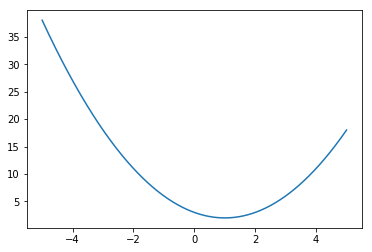

In [47]:
plt.figure()
plt.plot(x,y)
plt.show()

In [48]:
from sklearn.neural_network import MLPRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
red_funcion = MLPRegressor(hidden_layer_sizes=(500,), solver='adam', activation='relu', verbose=1)
red_funcion.fit(x, y)

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 104.54274586
Iteration 2, loss = 93.70256841
Iteration 3, loss = 83.31303183
Iteration 4, loss = 73.02388197
Iteration 5, loss = 62.78668769
Iteration 6, loss = 52.38647833
Iteration 7, loss = 42.16415699
Iteration 8, loss = 32.67310074
Iteration 9, loss = 24.41457486
Iteration 10, loss = 17.28583361
Iteration 11, loss = 11.84024295
Iteration 12, loss = 7.96522695
Iteration 13, loss = 5.65010431
Iteration 14, loss = 4.35257779
Iteration 15, loss = 3.78914838
Iteration 16, loss = 3.54399713
Iteration 17, loss = 3.43101724
Iteration 18, loss = 3.33078869
Iteration 19, loss = 3.24122221
Iteration 20, loss = 3.15508905
Iteration 21, loss = 3.07238756
Iteration 22, loss = 2.99488687
Iteration 23, loss = 2.92023646
Iteration 24, loss = 2.85067419
Iteration 25, loss = 2.78062203
Iteration 26, loss = 2.71592701
Iteration 27, loss = 2.65240131
Iteration 28, loss = 2.59224316
Iteration 29, loss = 2.53262906
Iteration 30, loss = 2.47799061
Iteration 31, loss = 2.42171980
Itera

/home/leninml/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [49]:
red_funcion.score(x_test,y_test)

0.9991146427710008

In [50]:
x_test = np.linspace(-5,5,500)
y_real = x_test*x_test-2*x_test+3
x_test = x_test.reshape(-1,1)
# x_test
y_pred = red_funcion.predict(x_test)

# y_pred

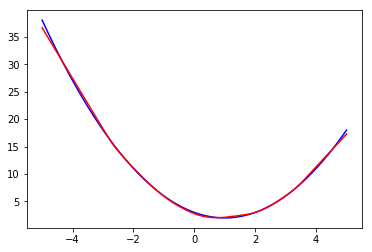

In [51]:
plt.figure()
plt.plot(x_test, y_real, color='blue')
plt.plot(x_test, y_pred, color='red')
plt.show()

¿Qué sucede si deseo calcular para un valor fuera del rango como por ejemplo $x=5.5$?

In [52]:
x_num = 16.
y_num = x_num*x_num-2*x_num+3
y_num

227.0

In [53]:
x_num = np.asarray(x_num)
x_num = x_num.reshape(-1,1)
y_num_pred = red_funcion.predict(x_num)
y_num_pred

array([82.91845536])

## Resolviendo el problema de clasificación del iris dataset
Considere el problema de clasificar las flores iris según la longitud y ancho del sépalo y el pétolo. Resuelva este problema utilizando Redes Neuronales Multicapa

In [56]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Los primeros 5 datos del dataset son $\mathbf{\mathcal{X}}:$

In [57]:
iris_dataset['data'][0:5,:]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Las etiquetas para las **muestras** o **samples** anteriores son:

In [58]:
iris_dataset['target'][0:5]

array([0, 0, 0, 0, 0])

Paso los datos del iris dataset a una variable $\mathbf{\mathcal{X}}$

In [59]:
X = iris_dataset['data']
Y = iris_dataset['target']

Codificando las clases como **ONE HOT**

In [60]:
from keras.utils import np_utils
Y_one_hot = np_utils.to_categorical(Y)
Y_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

Escalando los valores de $\mathbf{\mathcal{X}}$

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
funcion_escalado = scaler.fit(X)
X_escalado = X
# X_escalado = funcion_escalado.transform(X)
print(scaler.mean_)
print(X_escalado[0:5,:])
print('min {}'.format(X_escalado.min()))
print('max {}'.format(X_escalado.max()))
# StandardScaler?

[5.84333333 3.05733333 3.758      1.19933333]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
min 0.1
max 7.9


Dividiendo el dataset en train y test. Los datos se deben aleatorizar

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_escalado, Y_one_hot, test_size=0.2, random_state=2)
X_train[0:5,:]

array([[6.2, 2.8, 4.8, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.9, 3.6, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3. , 4.5, 1.5]])

In [87]:
Y_train[0:5]


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [88]:
red_iris = MLPClassifier(hidden_layer_sizes=(3,),
                        activation='tanh',
                        solver='sgd',
                        momentum=0.95,
                        max_iter=1500, verbose=1)


In [89]:
red_iris.fit(X_train, Y_train)

Iteration 1, loss = 2.57848298
Iteration 2, loss = 2.57647467
Iteration 3, loss = 2.57354228
Iteration 4, loss = 2.56973783
Iteration 5, loss = 2.56511221
Iteration 6, loss = 2.55971511
Iteration 7, loss = 2.55359498
Iteration 8, loss = 2.54679899
Iteration 9, loss = 2.53937299
Iteration 10, loss = 2.53136154
Iteration 11, loss = 2.52280789
Iteration 12, loss = 2.51375394
Iteration 13, loss = 2.50424034
Iteration 14, loss = 2.49430638
Iteration 15, loss = 2.48399011
Iteration 16, loss = 2.47332831
Iteration 17, loss = 2.46235647
Iteration 18, loss = 2.45110889
Iteration 19, loss = 2.43961861
Iteration 20, loss = 2.42791749
Iteration 21, loss = 2.41603619
Iteration 22, loss = 2.40400422
Iteration 23, loss = 2.39184990
Iteration 24, loss = 2.37960042
Iteration 25, loss = 2.36728185
Iteration 26, loss = 2.35491914
Iteration 27, loss = 2.34253612
Iteration 28, loss = 2.33015555
Iteration 29, loss = 2.31779908
Iteration 30, loss = 2.30548731
Iteration 31, loss = 2.29323978
Iteration 32, los

Iteration 435, loss = 1.25668219
Iteration 436, loss = 1.25587428
Iteration 437, loss = 1.25507047
Iteration 438, loss = 1.25427074
Iteration 439, loss = 1.25347504
Iteration 440, loss = 1.25268336
Iteration 441, loss = 1.25189567
Iteration 442, loss = 1.25111193
Iteration 443, loss = 1.25033212
Iteration 444, loss = 1.24955622
Iteration 445, loss = 1.24878420
Iteration 446, loss = 1.24801602
Iteration 447, loss = 1.24725167
Iteration 448, loss = 1.24649111
Iteration 449, loss = 1.24573432
Iteration 450, loss = 1.24498128
Iteration 451, loss = 1.24423196
Iteration 452, loss = 1.24348632
Iteration 453, loss = 1.24274436
Iteration 454, loss = 1.24200604
Iteration 455, loss = 1.24127134
Iteration 456, loss = 1.24054023
Iteration 457, loss = 1.23981269
Iteration 458, loss = 1.23908870
Iteration 459, loss = 1.23836822
Iteration 460, loss = 1.23765125
Iteration 461, loss = 1.23693774
Iteration 462, loss = 1.23622769
Iteration 463, loss = 1.23552106
Iteration 464, loss = 1.23481784
Iteration 

Iteration 833, loss = 1.10026590
Iteration 834, loss = 1.10008053
Iteration 835, loss = 1.09989566
Iteration 836, loss = 1.09971130
Iteration 837, loss = 1.09952744
Iteration 838, loss = 1.09934407
Iteration 839, loss = 1.09916120
Iteration 840, loss = 1.09897883
Iteration 841, loss = 1.09879695
Iteration 842, loss = 1.09861556
Iteration 843, loss = 1.09843466
Iteration 844, loss = 1.09825424
Iteration 845, loss = 1.09807431
Iteration 846, loss = 1.09789487
Iteration 847, loss = 1.09771590
Iteration 848, loss = 1.09753742
Iteration 849, loss = 1.09735941
Iteration 850, loss = 1.09718188
Iteration 851, loss = 1.09700482
Iteration 852, loss = 1.09682823
Iteration 853, loss = 1.09665212
Iteration 854, loss = 1.09647647
Iteration 855, loss = 1.09630129
Iteration 856, loss = 1.09612657
Iteration 857, loss = 1.09595231
Iteration 858, loss = 1.09577852
Iteration 859, loss = 1.09560519
Iteration 860, loss = 1.09543231
Iteration 861, loss = 1.09525989
Iteration 862, loss = 1.09508792
Iteration 

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.95,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

Evaluando el desempeño de entrenamiento de la Red Iris

In [90]:
red_iris.score(X_train, Y_train)

0.65

Evaluando el desempeño de la Red Iris en el dataset de Prueba

In [91]:
red_iris.score(X_test, Y_test)

0.7333333333333333

Dibujando la función de pérdida

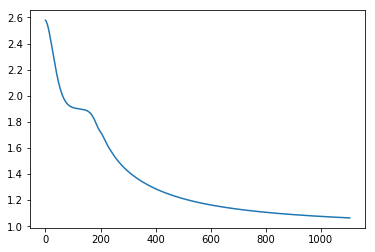

In [92]:
import matplotlib.pyplot as plt
cost_function = red_iris.loss_curve_
plt.figure()
plt.plot(cost_function)
plt.show()